<a href="https://colab.research.google.com/github/Suba2020/DS/blob/main/Image_Classification_using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Classification for CFAR10

Image Classification (CFAR10) using Convolutional Neural Networks with Max Pooling:

Tensorflow Framework, Python language

Tools: Keras, matplotlib


Creation and Updates by Suba:
1.   Image classification model creation, training and evaluation using GPU
2.   Plotting of model accuracy as well as model loss for training and validation inputs, on 05-Mar-2021


### **Setup**

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
#!pip install tensorflow-gpu==2.0.0-beta1

!pip install tensorflow
!pip install tensorflow-gpu==2.4.1

import numpy as np
np.random.seed(7)


import tensorflow as tf
tf.random.set_seed(7)
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


### **Importing the dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
print("train_images shape:", train_images.shape)
print("test_images shape:", test_images.shape)
print("train_labels shape:", train_labels.shape)
print("test_labels shape:", test_labels.shape)

train_images = train_images / 255
test_images = test_images / 255

train_images shape: (50000, 32, 32, 3)
test_images shape: (10000, 32, 32, 3)
train_labels shape: (50000, 1)
test_labels shape: (10000, 1)


### **Building the model**

In [3]:
model = tf.keras.models.Sequential()

Model has the following layers:

```
1. convolutional layer with 64 filters of size (5, 5), relu activation and the correct input shape
2. max pooling layer with pool_size (2, 2)
3. convolutional layer with 32 filters of size (5, 5), relu activation
4. max pooling layer with pool_size (2, 2)
5. flatten layer
6. dense layer with 64 units and relu activation
7. dense layer with 10 units and softmax activation
```


In [4]:
# build the model
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# check the number of parameters in the model

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [9]:
# compile the model
'''Using 'Adam' optimizer and 'accuracy' metric'''

"Using 'Adam' optimizer and 'accuracy' metric"

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, shuffle=True, validation_data = (test_images, test_labels))

Epoch 1/10
391/391 [==============================] - 6s 8ms/step - loss: 1.8654 - accuracy: 0.3215 - val_loss: 1.4850 - val_accuracy: 0.4603
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 1.4004 - accuracy: 0.4941 - val_loss: 1.2704 - val_accuracy: 0.5435
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 1.2303 - accuracy: 0.5623 - val_loss: 1.2266 - val_accuracy: 0.5653
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 1.1453 - accuracy: 0.5987 - val_loss: 1.1377 - val_accuracy: 0.6002
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0663 - accuracy: 0.6261 - val_loss: 1.1223 - val_accuracy: 0.6036
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0253 - accuracy: 0.6416 - val_loss: 1.0745 - val_accuracy: 0.6244
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 0.9729 - accuracy: 0.6605 - val_loss: 1.0447 - val_accuracy: 0.6375
Epoch 

In [12]:
# summarize history for accuracy
def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
# summarize history for loss
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

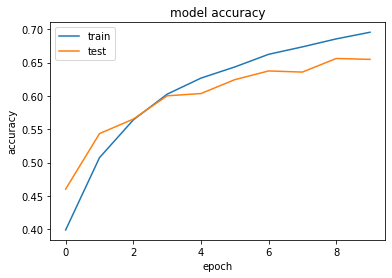

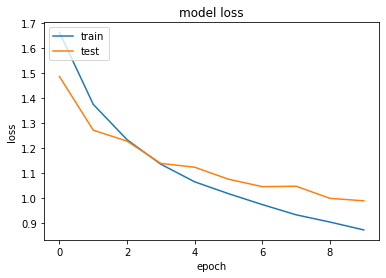

In [13]:
plot_acc(history)
plot_loss(history)